In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '../datasets/housing.csv'
df=pd.read_csv(file_path)

In [3]:
#--- Style Configuration ---#
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-deep')
sns.set_palette("pastel")
sns.set_context("paper")

In [4]:
#--- Check the first 5 rows ---#
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#--- Technical Summary ---#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#--- Statistical Summary ---#
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


/Users/eduardopolaco/PycharmProjects/Blog-AI-Projects/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/eduardopolaco/PycharmProjects/Blog-AI-Projects/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Users/eduardopolaco/PycharmProjects/Blog-AI-Projects/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


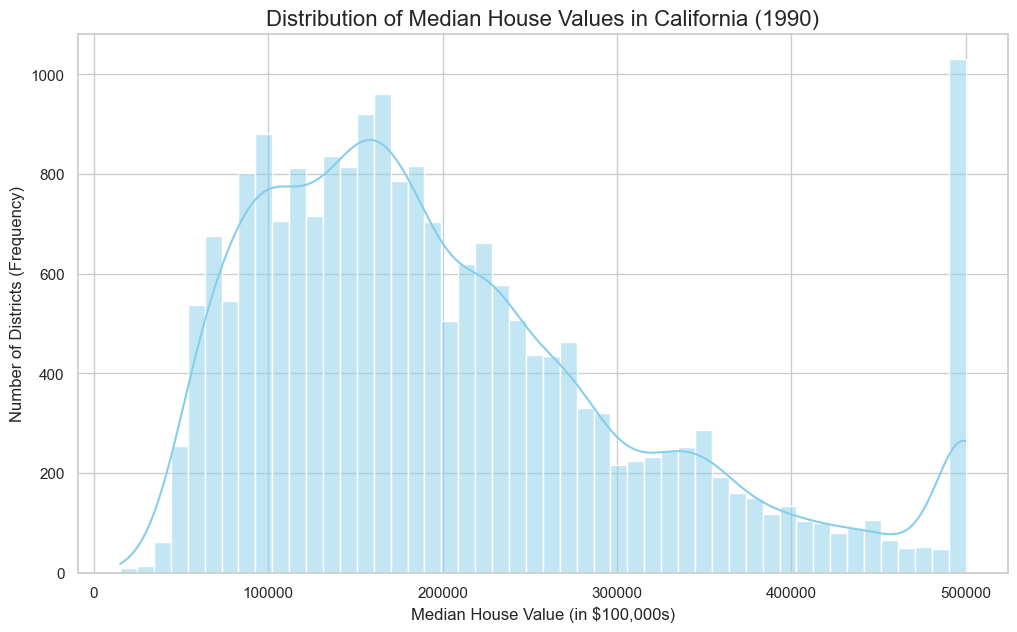

In [8]:
#--- Making the histogram ---#
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))

sns.histplot(df['median_house_value'], kde=True, bins=50, color='skyblue')

plt.title('Distribution of Median House Values in California (1990)', fontsize=16)
plt.xlabel('Median House Value (in $100,000s)', fontsize=12)
plt.ylabel('Number of Districts (Frequency)', fontsize=12)

plt.show()

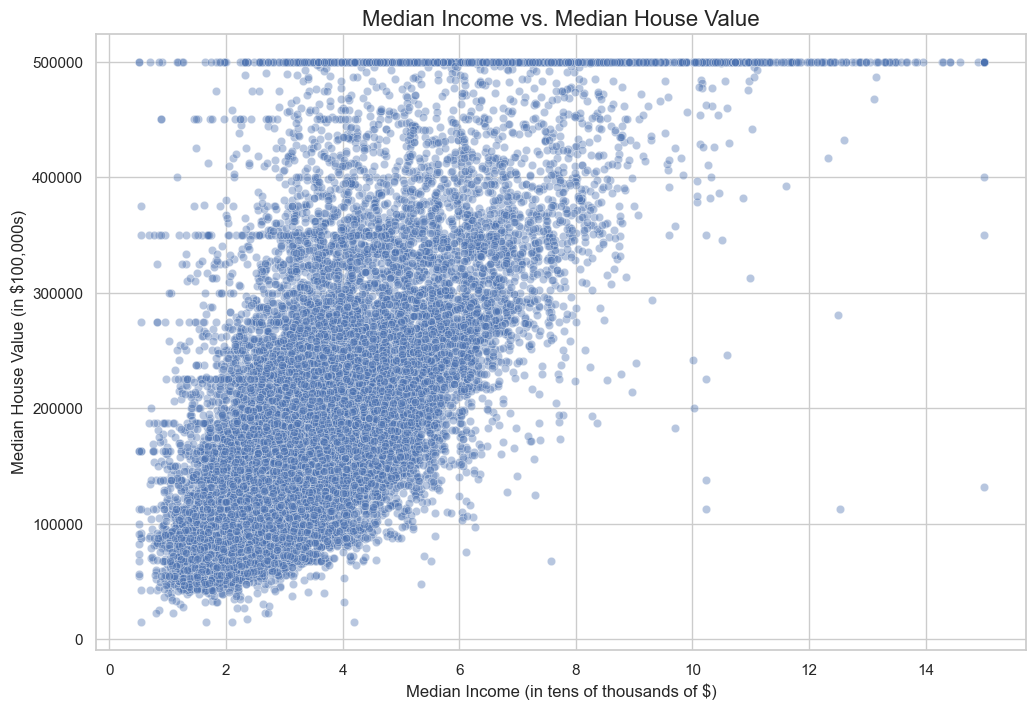

In [10]:
#--- Now a scatter plot ---#
plt.figure(figsize=(12, 8))


sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.4)

plt.title('Median Income vs. Median House Value', fontsize=16)
plt.xlabel('Median Income (in tens of thousands of $)', fontsize=12)
plt.ylabel('Median House Value (in $100,000s)', fontsize=12)

plt.show()

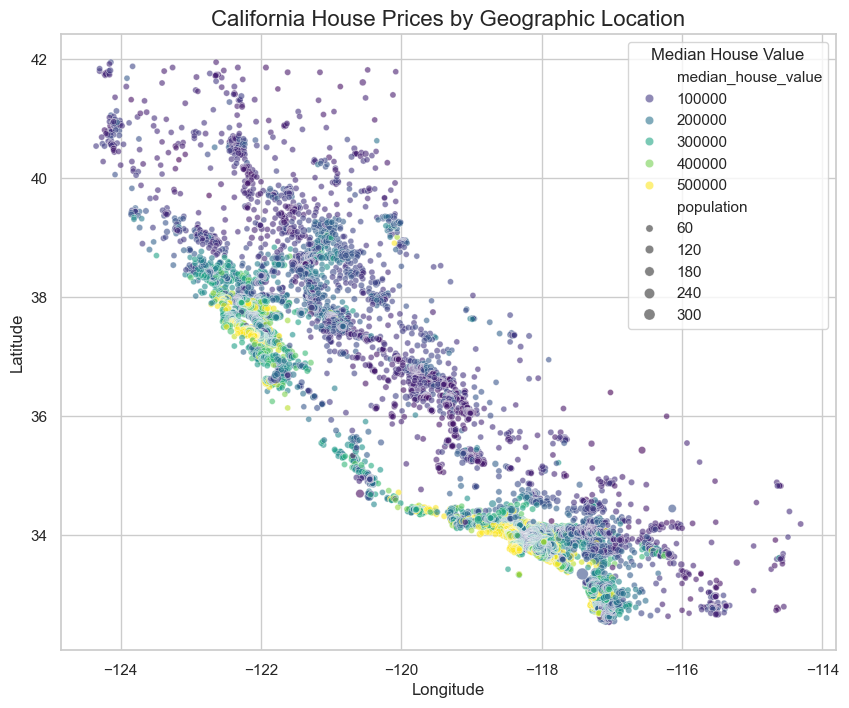

In [13]:
#--- Map of California ---#
plt.figure(figsize=(10, 8))

# Generate the scatter plot that will look like a map of California
sns.scatterplot(
    x='longitude',
    y='latitude',
    data=df,
    hue='median_house_value',
    size=df['population']/100,
    palette='viridis',
    alpha=0.6
)


plt.title('California House Prices by Geographic Location', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Median House Value')

plt.show()

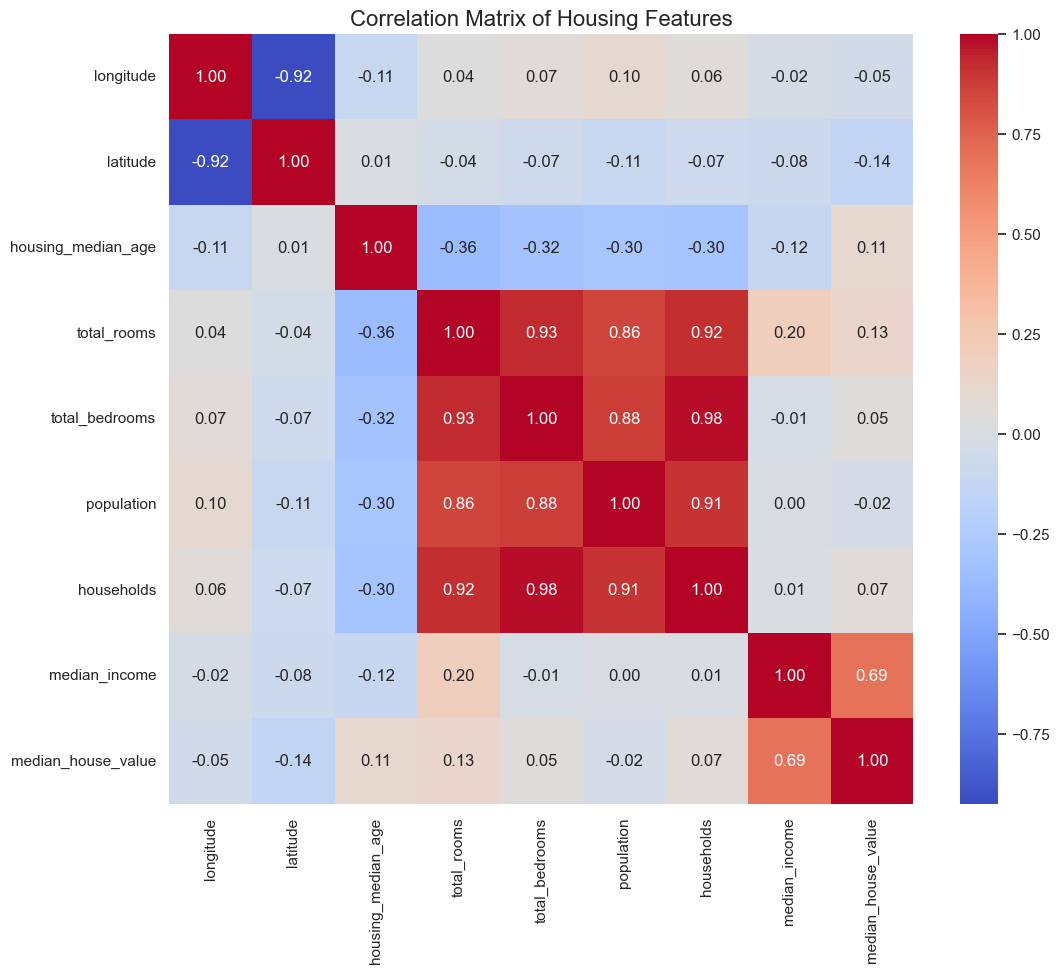

In [14]:
#--- The heatmap ---#
plt.figure(figsize=(12, 10))


correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix of Housing Features', fontsize=16)

plt.show()